In [2]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Created on Thu Aug  6 22:28:55 2020

@author: Krutika Verma
"""
# pulp is one such library which is used for the optimization of linear programming
# import the library pulp 
!pip install pulp
import pulp as p 
import matplotlib.pyplot as plt #it is used for creating scatter line bars, charts, figure, scatter plots etc.
import numpy as np # a whole-some package for performing basic scientific operations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


##### Brief explanation on working of the functions
######  First importing the library as p
######  LpProblem is a function defined in the pulp, having two parameters name and declaration of maximize/minimizing of function
######  LpVariable hold the variables of the objective functions. lower and upper bound of a variable can be defined, if not defined then default value will be taken
######   Lp_prob represents the objective function in terms of defined variables 
###### It holds all informtaion regarding variables and the problem 
###### using + sign will store the variables and its coefficients in there respective slots  

# Problem 1 
**Minimize** :  $Z = 3x + 5y$

**st:**
 
 $2x + 3y >= 12$

 $-x + y <= 3$

 $x >= 4$

 $y <= 3$

 $x, y >= 0$


Problem:
MINIMIZE
3*x + 5*y + 0
SUBJECT TO
_C1: 2 x + 3 y >= 12

_C2: - x + y <= 3

_C3: x >= 4

_C4: y <= 3

VARIABLES
x Continuous
y Continuous

Optimal
6.0 0.0 18.0


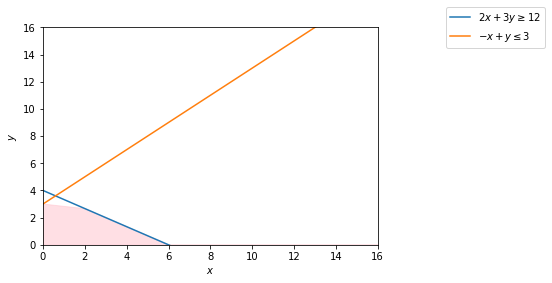

In [3]:
Lp_prob = p.LpProblem('Problem', p.LpMinimize)  

# Create problem Variables  
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 

# Objective Function 
Lp_prob += 3 * x + 5 * y    # x, and y are defined variables 

# Constraints: 
Lp_prob += 2 * x + 3 * y >= 12 
Lp_prob += -x + y <= 3
Lp_prob += x >= 4
Lp_prob += y <= 3

# Display the problem 
print(Lp_prob) 

status = Lp_prob.solve()   # Calling the default Solver  (CBC - coin or branch and cut)
print(p.LpStatus[status])   # The solution status  if 1-optimal, 0- no solution 

# Printing the final solution 
print(p.value(x), p.value(y), p.value(Lp_prob.objective)) 

z = np.linspace(0, 200, 100) # store 100 points in the range of 0, 200 in the form of list 
#Constraints
y1 = (12- 2*z)/3  # rewriting the constarints 
y2 = 3+z
# Make plot with the following arguments 
plt.plot(z, y1, label=r'$2x+3y\geq12$')  
plt.plot(z, y2, label=r'$-x+y\leq3$')
# defining the rant=ge of both the axes
plt.xlim((0, p.value(x)+ 10)) 
plt.ylim((0, p.value(x)+ 10))
#Labelling X and Y axis
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y1)
plt.fill_between(z, y5, color='pink',alpha=0.5)
plt.legend(bbox_to_anchor=(1.5, 1), loc=5, borderaxespad=0.)
plt.show()

#### Hard wired Programming can be extended up to multiple variables

## **Problem 2**

##### Assest/ liability cash-flow matching

**Maximize:** $w$ 

**for**

        c1+p1−e1= 150

        c2+p2+ 1.003e1−1.01c1−e2= 100

        c3+p3+ 1.003e2−1.01c2−e3=−200

        c4−1.02p1−1.01c3+ 1.003e3−e4= 200

        c5−1.02p2−1.01c4+ 1.003e4−e5=−50

        −1.02p3−1.01c5+ 1.003e5−w=−300

**st:**
$0 ≤ ci ≤100,$

$1≤ i ≤5$

$pi>0,1≤i≤3$

$ei≥0,1≤i≤5$


In [4]:
Lp_prob = p.LpProblem('Problem', p.LpMaximize) 
#c = p.LpVariable.dicts(f"c[i]",(i for i in range(1,6)),lowBound=0, upBound=100)
c= {i:p.LpVariable(name=f"c{i}", lowBound=0, upBound= 100) for i in range(1, 6)}
e= {i:p.LpVariable(name=f"e{i}", lowBound=0) for i in range(1, 6)}
pi= {i:p.LpVariable(name=f"pi{i}", lowBound=0) for i in range(1, 4)}
w = p.LpVariable("w") 

#objective function 
Lp_prob += w

# adding constraints
Lp_prob += c[1]+pi[1]- e[1] == 150
Lp_prob += c[2]+pi[2]+1.003*e[1]-1.01*c[1]-e[2] == 100
Lp_prob += c[3]+pi[3]+1.003*e[2]-1.01*c[2]-e[3] == -200
Lp_prob += c[4]-1.02*pi[1]-1.01*c[3]+1.003*e[3]-e[4] == 200
Lp_prob += c[5]-1.02*pi[2]-1.01*c[4]+1.003*e[4]-e[5] == -50
Lp_prob += -1.02*pi[3]-1.01*c[5]+1.003*e[5]-w == -300

print(Lp_prob) 


status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])   # The solution status 

# Printing the final solution


for var in c.values():
    print(f"{var.name}: {var.value()}")

for var in e.values():
    print(f"{var.name}: {var.value()}")
    
for var in pi.values():
    print(f"{var.name}: {var.value()}")

for name, constraint in Lp_prob.constraints.items():
    print(f"{name}: {constraint.value()}")

print( p.value(Lp_prob.objective)) 

Problem:
MAXIMIZE
1*w + 0
SUBJECT TO
_C1: c1 - e1 + pi1 = 150

_C2: - 1.01 c1 + c2 + 1.003 e1 - e2 + pi2 = 100

_C3: - 1.01 c2 + c3 + 1.003 e2 - e3 + pi3 = -200

_C4: - 1.01 c3 + c4 + 1.003 e3 - e4 - 1.02 pi1 = 200

_C5: - 1.01 c4 + c5 + 1.003 e4 - e5 - 1.02 pi2 = -50

_C6: - 1.01 c5 + 1.003 e5 - 1.02 pi3 - w = -300

VARIABLES
c1 <= 100 Continuous
c2 <= 100 Continuous
c3 <= 100 Continuous
c4 <= 100 Continuous
c5 <= 100 Continuous
e1 Continuous
e2 Continuous
e3 Continuous
e4 Continuous
e5 Continuous
pi1 Continuous
pi2 Continuous
pi3 Continuous
w free Continuous

Optimal
c1: 0.0
c2: 50.980392
c3: 0.0
c4: 0.0
c5: 0.0
e1: 0.0
e2: 0.0
e3: 351.94417
e4: 0.0
e5: 0.0
pi1: 150.0
pi2: 49.019608
pi3: 203.43436
_C1: 0.0
_C2: 0.0
_C3: -5.9200000350756454e-06
_C4: 2.509999944777519e-06
_C5: -1.5999999902760464e-07
_C6: 3.800000001774606e-06
92.496949


# Problem 3

**Maximize :**  $Z = 500x + 450y$

**St:** 

$x + 5/6 y <=10$

$x +2y <= 15$

$x <= 8$

$x, y >= 0$

Problem:
MAXIMIZE
500*x + 450*y + 0
SUBJECT TO
_C1: x + 0.833333333333 y <= 10

_C2: x + 2 y <= 15

_C3: x <= 8

VARIABLES
x Continuous
y Continuous

Optimal
6.4285714 4.2857143 5142.857135


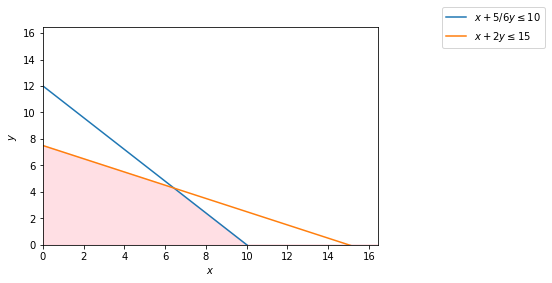

In [5]:
Lp_prob = p.LpProblem('Problem', p.LpMaximize)  

# Create problem Variables  
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 

# Objective Function 
Lp_prob += 500 * x + 450 * y    

# Constraints: 
Lp_prob += x + 5/6 * y <= 10
Lp_prob += x + 2*y <= 15
Lp_prob += x <= 8

# Display the problem 
print(Lp_prob) 

status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])   # The solution status 

# Printing the final solution 
print(p.value(x), p.value(y), p.value(Lp_prob.objective)) 

### for graphical represenation 
z = np.linspace(0, 600, 10000)
#Constraints
y1 = (10- z)/(5/6)
y2 = (15-z)/2
# Make plot
plt.plot(z, y1, label=r'$x+5/6y\leq10$')
plt.plot(z, y2, label=r'$x+2y\leq15$')
plt.xlim((0, p.value(x)+ 10))
plt.ylim((0, p.value(x)+ 10))
#Labelling X and Y axis
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y1)
plt.fill_between(z, y5, color='pink',alpha=0.5)
plt.legend(bbox_to_anchor=(1.5, 1), loc=5, borderaxespad=0.)
plt.show()


## Problem 4 (Brewer's Problem)

#### Minimze: 13A+23B
#### Subjet to: 
$5A+15B<=480$ (corn) &nbsp;

$4A+4B<=160$  (Hops) &nbsp;

$35A+20B <=1190$ (malt)

$A>=0$

$B>=0$

In [6]:
 Lp_prob = p.LpProblem('Brewers_Problem', p.LpMaximize) 
   
    # Create problem Variables  
A = p.LpVariable("A", lowBound = 0)   # Create a variable x >= 0 
B = p.LpVariable("B", lowBound = 0)   # Create a variable y >= 0   

# Objective Function 
Lp_prob += 13 * A + 23 * B   # x, and y are defined variables 
  
# Constraints: 
Lp_prob += 5 * A + 15 * B <=480 
Lp_prob += 4*A + 4*B <= 160
Lp_prob += 35*A + 20*B <= 1190
    
# Display the problem 
print(Lp_prob) 
  
status = Lp_prob.solve()   # Calling the default Solver  (CBC - coin or branch and cut)
print(p.LpStatus[status])   # The solution status  if 1-optimal, 0- no solution 
  
# Printing the final solution 
print(p.value(A), p.value(B), p.value(Lp_prob.objective)) 

Brewers_Problem:
MAXIMIZE
13*A + 23*B + 0
SUBJECT TO
_C1: 5 A + 15 B <= 480

_C2: 4 A + 4 B <= 160

_C3: 35 A + 20 B <= 1190

VARIABLES
A Continuous
B Continuous

Optimal
12.0 28.0 800.0


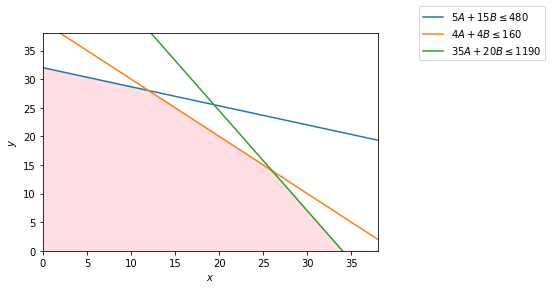

In [7]:
# for printing the figures
z = np.linspace(0, 200, 100) 
# store 100 points in the range of 0, 200 in the form of list 
#Constraints
y1 = (480-5*z)/15
y2 = (160-4*z)/4
y3 = (1190-35*z)/20

# Make plot with the following arguments 
plt.plot(z, y1, label=r'$5A+15B\leq480$')  
plt.plot(z, y2, label=r'$4A+4B\leq160$')
plt.plot(z, y3, label=r'$35A+20B\leq1190$')

# defining the rant=ge of both the axes
plt.xlim((0, p.value(B)+ 10)) # for ploting we will consider that argument which is maximum of all 
plt.ylim((0, p.value(B)+ 10))

#Labelling X and Y axis
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, np.minimum(y1,y3))
plt.fill_between(z, y5, color='pink',alpha=0.5)
plt.legend(bbox_to_anchor=(1.5, 1), loc=5, borderaxespad=0.)
plt.show()